In [1]:
import numpy as np  #does mathematical operation
import matplotlib.pyplot as plt #For plotting the graphs
import pandas as pd #making the data frames and import the csv files

In [2]:
from google.colab import drive #to import the google drive data

In [3]:
drive.mount('/content/drive')   # to mount the drive data into the colab cloud and enter the activation code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd /content/drive/"My Drive/ML nishit sir/kmean_vs_hierarchical" 

/content/drive/My Drive/ML nishit sir/kmean_vs_hierarchical


In [5]:
#dataset = pd.read_csv('kaggle_Interests_group.csv')
dataset=pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx')
dataset.dropna()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
1,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
2,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
3,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
4,2020-04-02,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...
9102,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
9103,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0
9104,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
9105,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


In [6]:
dataset.describe()

,day,month,year,cases,deaths,popData2018
count,9107.000000,9107.000000,9107.000000,9107.000000,9107.000000,9.071000e+03
mean,15.907214,2.529044,2019.992643,136.644449,7.573954,6.489138e+07
std,9.477003,1.277587,0.085461,1066.277024,64.457522,2.026879e+08
min,1.000000,1.000000,2019.000000,-9.000000,0.000000,1.000000e+03
25%,6.000000,2.000000,2020.000000,0.000000,0.000000,3.731000e+06
50%,17.000000,3.000000,2020.000000,0.000000,0.000000,1.062570e+07
75%,24.000000,3.000000,2020.000000,11.000000,0.000000,4.272314e+07
max,31.000000,12.000000,2020.000000,34272.000000,2004.000000,1.392730e+09


In [20]:
x = dataset.iloc[np.r_[1495:1592,3822:3918,2991:3802,4412:4456,8512:8535],4:6].values  #Canada,India,France,Italy,Turkey
x.shape

(1071, 2)

In [8]:
import scipy.cluster.hierarchy as sch

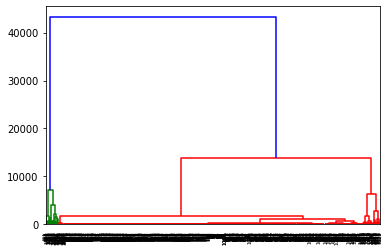

In [9]:
#import sys
#sys.setrecursionlimit(50)
dendogram = sch.dendrogram(sch.linkage(x,method='ward'))

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [12]:
y_hc = hc.fit_predict(x)

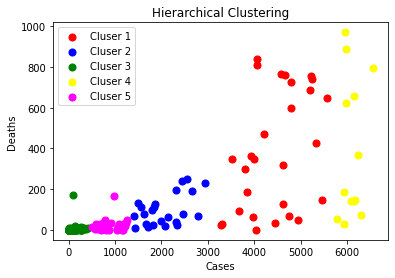

In [13]:
#Visualiz the Cluster
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=50,c='red',label='Cluser 1')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=50,c='blue',label='Cluser 2')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=50,c='green',label='Cluser 3')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=50,c='yellow',label='Cluser 4')
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=50,c='magenta',label='Cluser 5')
plt.title('Hierarchical Clustering')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.legend()

In [14]:
from sklearn.cluster import KMeans

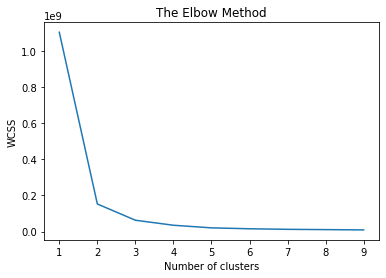

In [15]:
wcss=[]
for i in range(1,10):
    kmeans= KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
kmeans= KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(x)

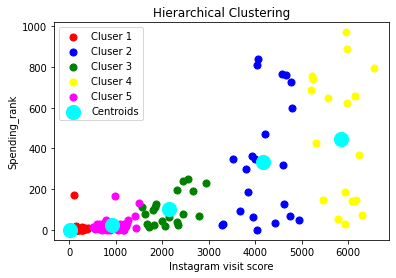

In [17]:
#Visualiz the Cluster
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=50,c='red',label='Cluser 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=50,c='blue',label='Cluser 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=50,c='green',label='Cluser 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=50,c='yellow',label='Cluser 4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=50,c='magenta',label='Cluser 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'cyan', label = 'Centroids')

plt.title('Hierarchical Clustering')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.legend()